# EX 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.figure as fig
import matplotlib.pyplot as plt
from scipy.stats import kstest

In [2]:
v = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(1000)]

In [3]:
# mean = sum(v) / 1000
# arr = np.array(v)
# np.var(arr)
# s = (sum( [ (v[i] - mean)**2 for i in range(1000)] ) / 100)**0.5
# s

c:\users\danj\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


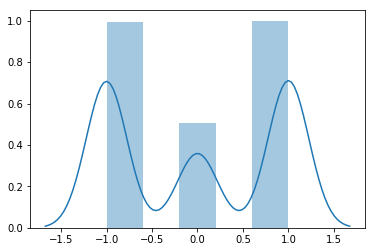

In [4]:
sns.distplot(v)

In [87]:
small = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(10)]
small

[0, 0, -1, 1, 1, 1, 0, 0, -1, -1]

In [88]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [89]:
mean_confidence_interval(small)

(0.0, -0.5840864678533121, 0.5840864678533121)

In [90]:
def try1000(ans, ln):
    for i in range(1000):
        small = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(ln)]
        m, l, r = mean_confidence_interval(small)
        if l <= 0 <= r :
            ans.append(1)
        else:
            ans.append(0)
    return sum(ans) / 1000 * 100

In [91]:
ten = try1000([], 10)
fifth = try1000([], 15)
twenth = try1000([], 20)
twenfifth = try1000([], 25)
therth = try1000([], 30)

In [92]:
print('{:.1f}'.format(ten) + ' %')
print('{:.1f}'.format(fifth) + ' %')
print('{:.1f}'.format(twenth) + ' %')
print('{:.1f}'.format(twenfifth) + ' %')
print('{:.1f}'.format(therth) + ' %')

95.8 %
94.0 %
93.9 %
95.5 %
93.8 %


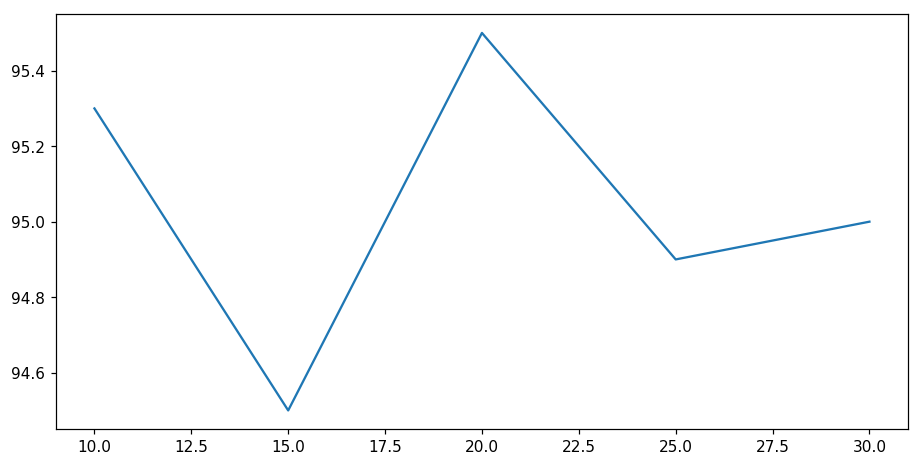

In [11]:
fig = plt.figure(figsize=(10., 5.), dpi=110)
plt.plot([10, 15, 20, 25, 30], [ten, fifth, twenth, twenfifth, therth])

# EX 2
### Генерация всевдослучайных чисел степенным остаточным методом
Назначаем начальное число z1 < 10000. Последующие числа получаем из соотношения z_i = ((z_{i-1}^{2.5})//100)%10000, div — целая часть от деления, mod — остаток от деления.
Полученная последовательность укладывается в пределы от 0 до 1 так: x_i = z_i / 10000.


In [93]:
import collections
import random
def generate_ost_1(n):
    z1 = 1237
    arr = [z1]
    for i in range(n - 1):
        arr.append((int(arr[-1]**2.5) // 100) % 10000)
    arr = [arr[i] / 10000 for i in range(len(arr))]
    return arr

In [94]:
def coun(data):
    n = len(data)
    cnt = {}
    for i in data:
        if i in cnt:
            cnt[i] += 1
        else: 
            cnt[i] = 1
    Fn = []
    for i in cnt:
        for j in range(cnt[i]):
            prev = 0
            if len(Fn) > 0:
                prev = Fn[-1]
            Fn.append(cnt[i] / n + prev)
    return Fn

In [72]:
data = generate_ost_1(100)
R = sorted(data)
Fn = coun(data)
print(Fn[:10:])
print(R[:10:])

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999]
[0.0082, 0.0145, 0.0256, 0.0326, 0.034, 0.0485, 0.0608, 0.0678, 0.084, 0.115]


(array([ 9., 12.,  8., 14.,  9.,  9.,  8.,  9., 12., 10.]),
 array([0.0082 , 0.10493, 0.20166, 0.29839, 0.39512, 0.49185, 0.58858,
        0.68531, 0.78204, 0.87877, 0.9755 ]),
 <a list of 10 Patch objects>)

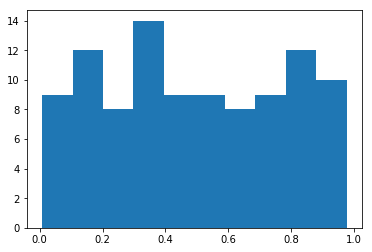

In [68]:
plt.hist(data, 10)

In [73]:
dn = -1 * 10 ** 5
for i in range(100):
    a = Fn[i] - R[i]
    dn = max(dn, a)
dn

0.05700000000000027

In [78]:
import math
n = 100
our_crit = n ** 0.5 * dn
kol_crit = (-0.5 * math.log(0.05 / 2)) ** 0.5
print(dn)
print(our_crit)
print(kol_crit)
if our_crit <= kol_crit:
    print('H0 is correct and Fn is like F')
else:
    print('H0 is not correct and Fn is not like F')

0.05700000000000027
0.5700000000000027
1.3581015157406195
H0 is correct and Fn is like F


In [117]:
new_data = generate_ost_1(10000)
R = sorted(new_data)
Fn = coun(new_data)
print(len(R))
print(Fn[:10:])
print(R[:20:])

10000
[0.0087, 0.0174, 0.026099999999999998, 0.0348, 0.0435, 0.052199999999999996, 0.060899999999999996, 0.0696, 0.0783, 0.087]
[0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078]


(array([1033., 1121.,  692., 1296.,  775., 1034.,  860., 1120., 1035.,
        1034.]),
 array([0.0078 , 0.10457, 0.20134, 0.29811, 0.39488, 0.49165, 0.58842,
        0.68519, 0.78196, 0.87873, 0.9755 ]),
 <a list of 10 Patch objects>)

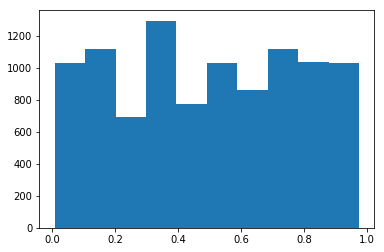

In [107]:
plt.hist(new_data, 10)

In [108]:
dn = -1 * 10 ** 5
for i in range(10000):
    a = abs(Fn[i] - R[i])
    dn = max(dn, a)

In [109]:
dn

85.23330000000747

In [105]:
import math
n = 10000
our_crit = n ** 0.5 * dn
kol_crit = (-0.5 * math.log(0.05 / 2)) ** 0.5
print(dn)
print(our_crit)
print(kol_crit)
if our_crit <= kol_crit:
    print('H0 is correct and Fn is like F')
else:
    print('H0 is not correct and Fn is not like F')

85.23330000000747
8523.330000000748
1.3581015157406195
H0 is not correct and Fn is not like F
